# 02 - Data from the Web

## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-fÃ©dÃ©rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
    - Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
    - Answer the previous question aggregating the data by (c) country and (d) region.
    
 Plot your data using bar charts and describe briefly what you observed.

2. Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4. Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5. Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

##  Textual description of your thought process, the assumptions you made, and the solution you plan to implement!

### Thought process:

www.topuniversities.com 
1. get https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508228964836
    a. this is a json file
2. obtain name rank country region
3. get https://www.topuniversities.com/universities/ecole-polytechnique-f%C3%A9d%C3%A9rale-de-lausanne-epfl
    a. this is a html file
4. get number of faculty -- international and total, number of students -- international and total

### analysis
1. Faculty : student ratio
2. international student : total student ratio



### Our assumptions:
Location in times_university is country.
There is no international faculty in Indian Institute of Science (IISc) Bangalore (top_uni).


### Implementation solution:

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1.

We first crawl data from the webpages, including the details page of universities we are interested in, and then put it into a dataframe.

In [221]:
# Request the main page containing the rank
req1 = requests.get('https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508228964836')
body = req1.json()
body_data = body['data']

# The fields we are interested in
# Global data
dict_fields = {'Name':    'title',
               'Rank':    'rank_display',
               'Country': 'country',
               'Region':  'region'}
# Detail pages
dict_class_names = {'No. of International Faculty':  'inter faculty',
                    'No. of Total Faculty':          'total faculty',
                    'No. of International Students': 'total inter',
                    'No. of Total Students':         'total student'}

# The helper function that gets information from details pages
def get_numbers(soup, class_name):
    try:
        num = float(soup.find(class_=class_name).find(class_='number').string[1:-1].replace(",", ""))
    except:
        # If there's no data, print an error and fall back to NaN
        num = float("NaN")
        school_name = soup.find(class_ = "qs-profile-2 content panel-panel").find_next('h1').string
        print("Error in " + school_name + ": Can't find " + class_name)
    return num

# Add data of each university one by one
rank_list = []
for i in range(200):
    # Request the details page
    details = requests.get('https://www.topuniversities.com' + body_data[i]['url'])
    html_body = details.text
    # Parse the HTML
    soup = BeautifulSoup(html_body, 'html.parser')
    
    dict_school = {}
    for field, field_name in dict_fields.items():
        dict_school[field] = body_data[i][field_name]
    for field, class_name in dict_class_names.items():
        dict_school[field] = get_numbers(soup, class_name)
    
    rank_list.append(dict_school)
    
# Use dictionary to create Dataframe for data from topuniversities.com
top_ranking_universities = pd.DataFrame.from_dict(rank_list)


Error in New York University (NYU): Can't find inter faculty
Error in New York University (NYU): Can't find total faculty
Error in New York University (NYU): Can't find total inter
Error in New York University (NYU): Can't find total student
Error in Indian Institute of Science (IISc) Bangalore: Can't find inter faculty


In [222]:
# top_ranking_universities = pd.read_csv('top_ranking_universities.csv')

In [223]:
# Convert string values under Rank to int
top_ranking_universities['Rank'] = top_ranking_universities.Rank.apply(lambda num: int(num.replace('=', '')))

In [224]:
top_ranking_universities.head()

,Country,Name,No. of International Faculty,No. of International Students,No. of Total Faculty,No. of Total Students,Rank,Region
0,United States,Massachusetts Institute of Technology (MIT),1679.0,3717.0,2982.0,11067.0,1,North America
1,United States,Stanford University,2042.0,3611.0,4285.0,15878.0,2,North America
2,United States,Harvard University,1311.0,5266.0,4350.0,22429.0,3,North America
3,United States,California Institute of Technology (Caltech),350.0,647.0,953.0,2255.0,4,North America
4,United Kingdom,University of Cambridge,2278.0,6699.0,5490.0,18770.0,5,Europe


The New York University's page has no data on the number of faculty and students. The Indian Institute of Science has no international faculty.

From the dataframe obtained, we compute the ratio of factulty to student and international student to total student.

In [225]:
# Add new columns
top_ranking_universities['Faculty : Students'] = \
    top_ranking_universities['No. of Total Faculty']/ \
    top_ranking_universities['No. of Total Students']
top_ranking_universities['International Students : Total Students'] = \
    top_ranking_universities['No. of International Students']/ \
    top_ranking_universities['No. of Total Students']

top_ranking_universities.head()

,Country,Name,No. of International Faculty,No. of International Students,No. of Total Faculty,No. of Total Students,Rank,Region,Faculty : Students,International Students : Total Students
0,United States,Massachusetts Institute of Technology (MIT),1679.0,3717.0,2982.0,11067.0,1,North America,0.269450,0.335863
1,United States,Stanford University,2042.0,3611.0,4285.0,15878.0,2,North America,0.269870,0.227422
2,United States,Harvard University,1311.0,5266.0,4350.0,22429.0,3,North America,0.193945,0.234785
3,United States,California Institute of Technology (Caltech),350.0,647.0,953.0,2255.0,4,North America,0.422616,0.286918
4,United Kingdom,University of Cambridge,2278.0,6699.0,5490.0,18770.0,5,Europe,0.292488,0.356899


### Question 1 (a): Which are the best universities in term of ratio between faculty members and students?

In [226]:
# Sort the dataframe by faculty-student ratio in descending order 
top_uni_by_facstud = top_ranking_universities.sort_values(
    by = 'Faculty : Students',
    ascending = False
)
top_uni_by_facstud[['Rank', 'Name', 'Faculty : Students']].head(10)

,Rank,Name,Faculty : Students
3,4,California Institute of Technology (Caltech),0.422616
15,16,Yale University,0.398323
5,6,University of Oxford,0.342292
4,5,University of Cambridge,0.292488
16,17,Johns Hopkins University,0.276353
1,2,Stanford University,0.269870
0,1,Massachusetts Institute of Technology (MIT),0.269450
185,186,University of Rochester,0.266604
18,19,University of Pennsylvania,0.266437
17,18,Columbia University,0.247115


In [227]:
def plot_bar(column_name, number_bars, dataframe,y_ticks_label):
    fig = plt.figure()
    ax = fig.add_axes((0,0,1,0.96))

    fig.suptitle(column_name, fontsize=20)
    fig.set_size_inches(5, 10)

    ax.barh(np.arange(number_bars), dataframe.head(number_bars)[column_name], align='center')
    ax.set_xlabel('Ratio', fontsize=20)
    ax.set_yticks(np.arange(number_bars))
    ax.set_yticklabels(y_ticks_label)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.margins(x=1e-2,y=1e-2)

    plt.show()

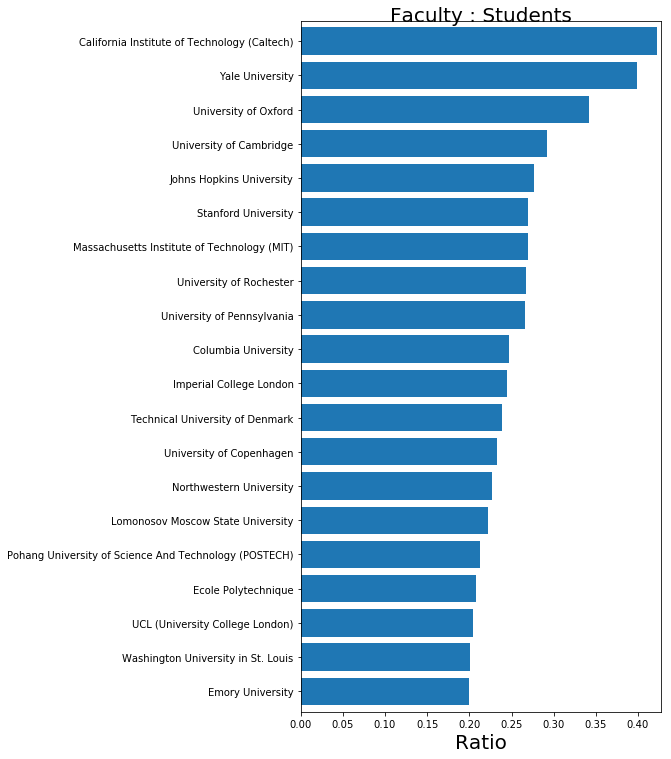

In [228]:
# Plot the faculty:student ratio

plot_bar('Faculty : Students', 20, top_uni_by_facstud, top_uni_by_facstud.Name)


# fig = plt.figure()
# ax = fig.add_axes((0,0,1,0.96))

# fig.suptitle('Faculty to Student Ratio', fontsize=20)
# fig.set_size_inches(5, 10)

# ax.barh(np.arange(20), top_uni_by_facstud.head(20)['Faculty : Students'], align='center')
# ax.set_xlabel('Ratio', fontsize=20)
# ax.set_yticks(np.arange(20))
# ax.set_yticklabels(top_uni_by_facstud.Name)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.margins(x=1e-2,y=1e-2)

# plt.show()

### Question 1 (b): Which are the best universities in term of ratio of international students?

In [229]:
# Sort by the desired column
top_uni_by_interstud = top_ranking_universities.sort_values(
    by = 'International Students : Total Students',
    ascending = False
)
top_uni_by_interstud[['Rank', 'Name', 'International Students : Total Students']].head(10)

,Rank,Name,International Students : Total Students
34,35,London School of Economics and Political Scien...,0.691393
11,12,Ecole Polytechnique Fédérale de Lausanne (EPFL),0.570047
7,8,Imperial College London,0.543567
198,200,Maastricht University,0.502533
47,47,Carnegie Mellon University,0.478062
6,7,UCL (University College London),0.477928
91,92,University of St Andrews,0.457955
41,41,The University of Melbourne,0.427434
126,127,Queen Mary University of London,0.421816
25,26,The University of Hong Kong,0.407144


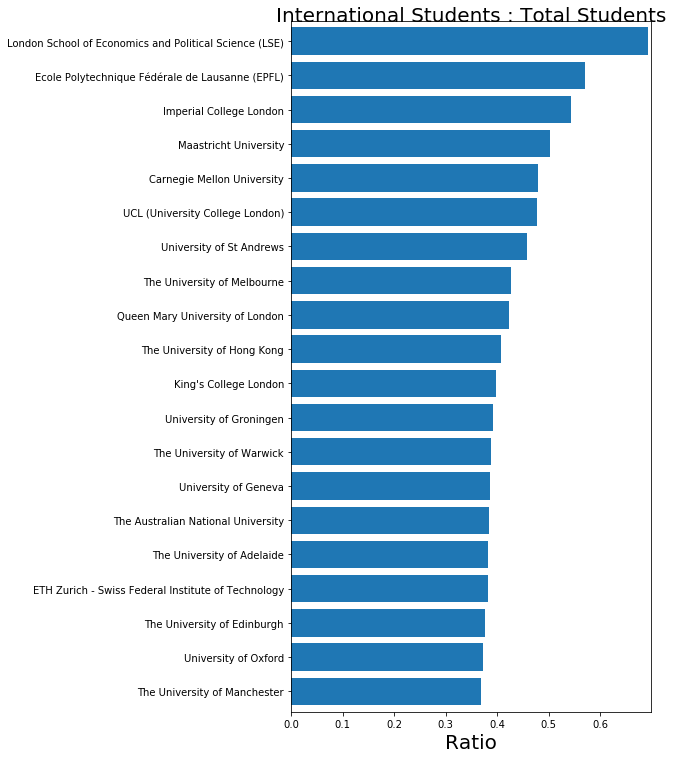

In [230]:
# Plot the international:total student ratio
plot_bar('International Students : Total Students', 20, top_uni_by_interstud, top_uni_by_interstud.Name)

### Question 1 (c): Answer the previous question aggregating the data by country.

We computed the average of the data of all universities in each country.

In [231]:
# Group data by country and compute the average of all fields
by_country = top_ranking_universities.groupby('Country').mean()

# Sort the entries of each group
country_facstud = by_country.sort_values(
    by = 'Faculty : Students',
    ascending = False
)

country_interstud = by_country.sort_values(
    by = 'International Students : Total Students',
    ascending = False
)

country_facstud[['Faculty : Students']].head()

,Faculty : Students
Country,
Russia,0.221910
Denmark,0.186580
Saudi Arabia,0.175828
Singapore,0.162279
Japan,0.155840


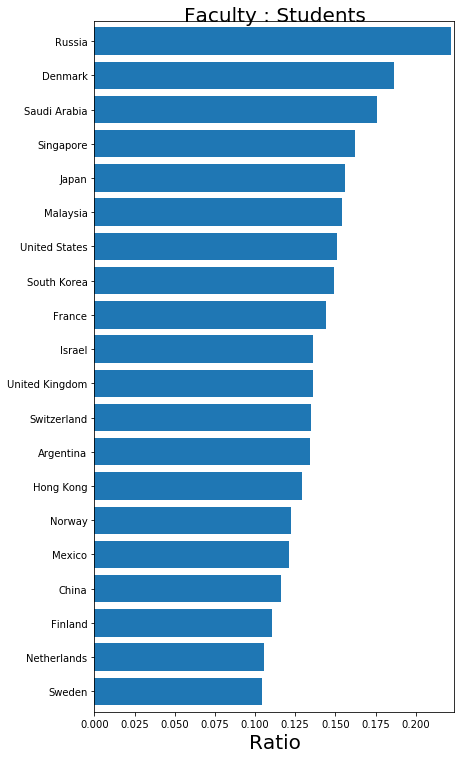

In [232]:
# fig = plt.figure()
# ax = fig.add_axes((0,0,1,0.96))

# fig.suptitle('Faculty to Student Ratio', fontsize=20)
# fig.set_size_inches(5, 10)

# ax.barh(np.arange(20), country_facstud.head(20)['Faculty : Students'], align='center')
# ax.set_xlabel('Ratio', fontsize=20)
# ax.set_yticks(np.arange(20))
# ax.set_yticklabels(country_facstud.index)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.margins(x=1e-2,y=1e-2)

# plt.show()

plot_bar('Faculty : Students', 20, country_facstud, country_facstud.index)

In [233]:
country_interstud[['International Students : Total Students']].head()

,International Students : Total Students
Country,
United Kingdom,0.351308
Australia,0.346878
Switzerland,0.313816
Hong Kong,0.312148
Austria,0.306095


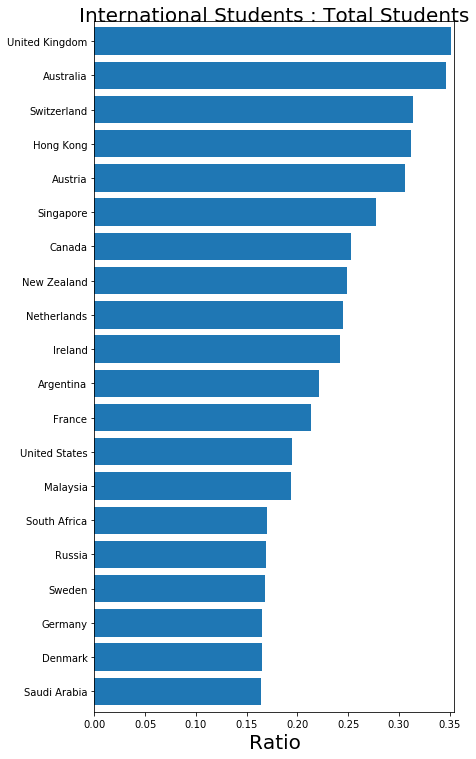

In [234]:
plot_bar('International Students : Total Students', 20, country_interstud, country_interstud.index)

### Question 1 (d): Answer the previous question aggregating the data by region.

Same as above, but grouping by region.

In [235]:
# Group data by country and compute the average of all fields
by_region = top_ranking_universities.groupby('Region').mean()

# Sort the entries of each group
region_facstud = by_region.sort_values(
    by = 'Faculty : Students',
    ascending = False
)

region_interstud = by_region.sort_values(
    by = 'International Students : Total Students',
    ascending = False
)

region_facstud[['Faculty : Students']]

,Faculty : Students
Region,
North America,0.144831
Asia,0.134673
Europe,0.120003
Latin America,0.096779
Africa,0.088450
Oceania,0.075003


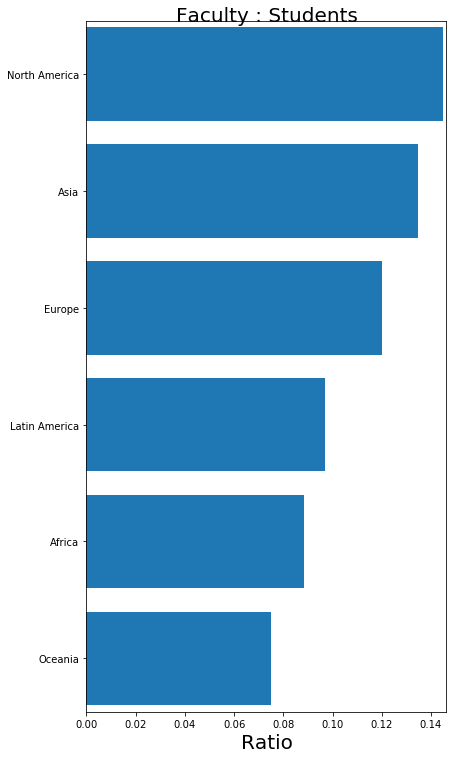

In [236]:
plot_bar('Faculty : Students', 6, region_facstud, region_facstud.index)

In [237]:
region_interstud[['International Students : Total Students']]

,International Students : Total Students
Region,
Oceania,0.329077
Europe,0.245932
North America,0.202437
Africa,0.169703
Asia,0.132394
Latin America,0.071751


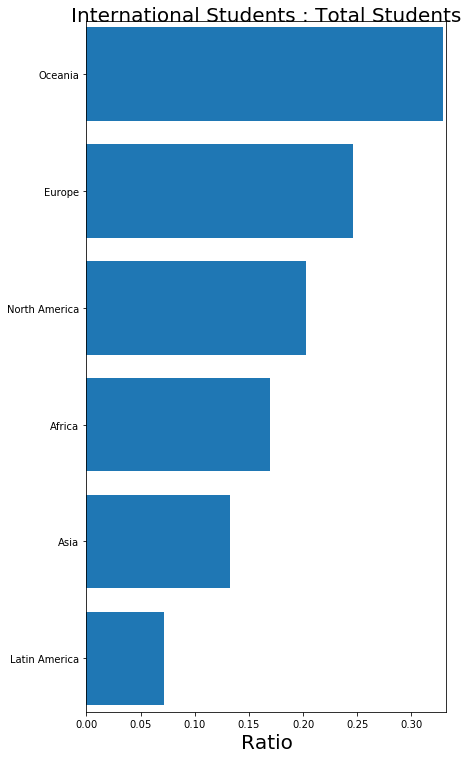

In [238]:
plot_bar('International Students : Total Students', 6, region_interstud, region_interstud.index)

### Question 2: Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

The data is located at https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json

The fields we're interested in are
* rank
* name
* aliases
* location
* stats_number_students
* stats_student_staff_ratio
* stats_pc_intl_students

In [239]:
# Fetch the data
req_times = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
body_times = req_times.json()
body_times_data = body_times['data']

The Times Higher Education ranking defines "Staff" as "those involved in teaching or research" which matches our definition of "Faculty"

In [240]:
# Parse the data and build a dataframe
rank_list_times = []

for i in range(200):
    name = body_times_data[i]['name']
    aliases = body_times_data[i]['aliases']
    rank = body_times_data[i]['rank'].strip('=')
    location = body_times_data[i]['location']
    
    # Python doesn't like commas as thousands separators, remove them
    num_students = int(body_times_data[i]['stats_number_students'].replace(",",""))
    faculty_students = 1 / float(body_times_data[i]['stats_student_staff_ratio'])
    
    # Same for percentage signs. In addition we need to remove divide by 100
    perc_international = int(body_times_data[i]['stats_pc_intl_students'].strip("%"))/100.0
    
    rank_list_times.append({'Name': name,
                            'Aliases': aliases,
                            'Rank': rank,
                            'Country': location,
                            'No. of Total Students': num_students,
                            'Faculty : Students': faculty_students,
                            'International Students : Total Students': perc_international})
    
times_universities_no_region = pd.DataFrame.from_dict(rank_list_times)

In [241]:
# Convert string values under Rank to int

times_universities_no_region['Rank'] = times_universities_no_region.Rank.apply(lambda string: int(string.replace('=', '')))

This dataset lacks a 'Region' column, but we can add one using the data from the topuniversities ranking.

In [242]:
tu_region_country = top_ranking_universities[['Region', 'Country']].drop_duplicates()
# Left join because we want all the rows that were originally in the times dataframe and only those
times_with_region = pd.merge(times_universities_no_region, tu_region_country, how='left')

# Check for missing data
times_with_region[times_with_region.Region.isnull()]

,Aliases,Country,Faculty : Students,International Students : Total Students,Name,No. of Total Students,Rank,Region
178,University of Luxembourg,Luxembourg,0.068493,0.57,University of Luxembourg,4969,179,NaN
193,Lomonosov Moscow State University,Russian Federation,0.136986,0.22,Lomonosov Moscow State University,29236,194,NaN


We need to add the missing regions manually.

In [243]:
trc = tu_region_country.append([
    {'Country': 'Luxembourg', 'Region': 'Europe'},
    {'Country': 'Russian Federation', 'Region': 'Europe'}
])
times_universities = pd.merge(times_universities_no_region, trc, how='left')

# Check if there are still any missing values
times_universities.Region.isnull().any()

False

In [244]:
times_universities.head()

,Aliases,Country,Faculty : Students,International Students : Total Students,Name,No. of Total Students,Rank,Region
0,University of Oxford,United Kingdom,0.089286,0.38,University of Oxford,20409,1,Europe
1,University of Cambridge,United Kingdom,0.091743,0.35,University of Cambridge,18389,2,Europe
2,California Institute of Technology caltech,United States,0.153846,0.27,California Institute of Technology,2209,3,North America
3,Stanford University,United States,0.133333,0.22,Stanford University,15845,3,North America
4,Massachusetts Institute of Technology,United States,0.114943,0.34,Massachusetts Institute of Technology,11177,5,North America


Even though the two rankings use similar definitions for "Faculty" and "Students", the results appear to be significantly different: for example, the faculty to student ratio is more than four times higher in the topuniversities ranking than in the THE ranking for the university of Oxford.

[QS's definition](http://www.iu.qs.com/university-rankings/indicator-faculty-student/)   
Full Time Equivalent (FTE) faculty
Faculty numbers used are totals… whilst it would be ideal to separate the notions of teaching and research and use the former for calculating this indicator and the latter for the Citations per Faculty indicator, it has not been possible to do so as data to that degree of distinction has so far proved unavailable for many countries in the study. The definition of exactly what data we request has evolved gradually over the years to minimize ambiguity.


[THE's definition](https://www.timeshighereducation.com/world-university-rankings-2018-table-information)
This is the ratio of full-time equivalent students to the number of academic staff – those involved in teaching or research.

### Question 2 (a): Which are the best universities in term of ratio between faculty members and students?

For the above reason, this ranking differs significantly from the one obtained from the topuniversities data.

In [245]:
times_uni_by_facstud = times_universities.sort_values(
    by = 'Faculty : Students',
    ascending=False
)

times_uni_by_facstud[['Rank', 'Name', 'Faculty : Students']].head(10)

,Rank,Name,Faculty : Students
105,105,Vanderbilt University,0.303030
109,109,University of Copenhagen,0.243902
153,153,University of Rochester,0.232558
11,12,Yale University,0.232558
12,13,Johns Hopkins University,0.232558
97,98,Emory University,0.227273
16,17,Duke University,0.222222
114,115,École Polytechnique,0.196078
183,184,Scuola Normale Superiore di Pisa,0.192308
101,100,University of Pittsburgh,0.169492


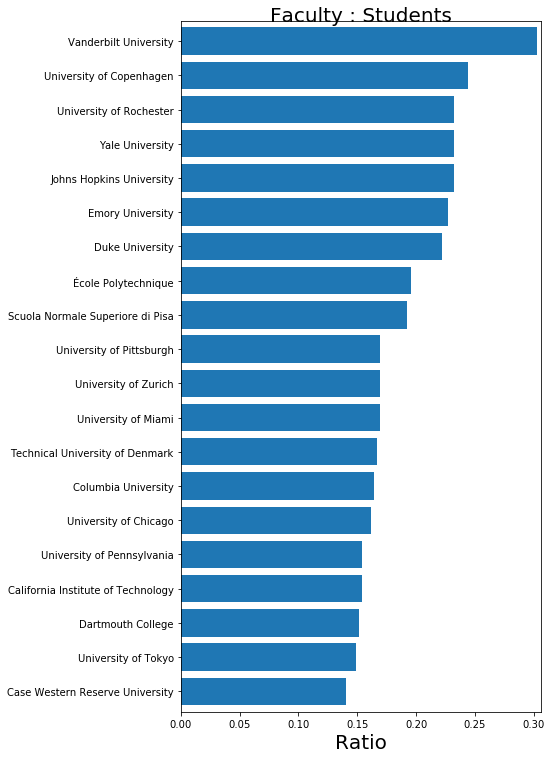

In [246]:
plot_bar('Faculty : Students', 20, times_uni_by_facstud, times_uni_by_facstud.Name)

### Question 2 (b): Which are the best universities in term of ratio of international students?

In [247]:
times_uni_by_interstud = times_universities.sort_values(
    by = 'International Students : Total Students',
    ascending=False
)

times_uni_by_interstud[['Rank', 'Name', 'International Students : Total Students']].head(10)

,Rank,Name,International Students : Total Students
24,25,London School of Economics and Political Science,0.71
178,179,University of Luxembourg,0.57
37,38,École Polytechnique Fédérale de Lausanne,0.55
7,8,Imperial College London,0.55
102,103,Maastricht University,0.50
15,16,University College London,0.49
143,143,University of St Andrews,0.48
23,24,Carnegie Mellon University,0.45
120,121,Queen Mary University of London,0.45
39,40,University of Hong Kong,0.42


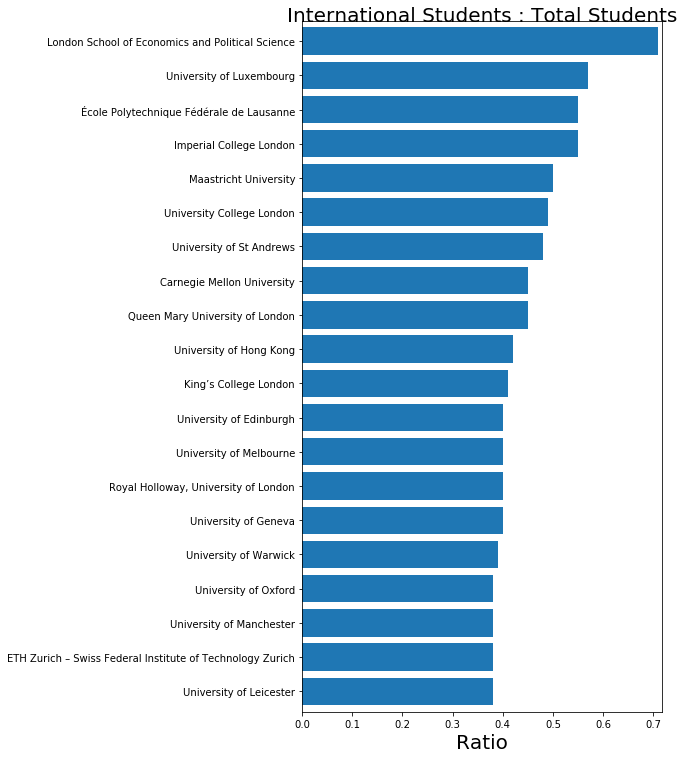

In [248]:
plot_bar('International Students : Total Students', 20, times_uni_by_interstud, times_uni_by_interstud.Name)

### Question 2 (c): Answer the previous question aggregating the data by country.

In [249]:
# Group data by country and compute the average of all fields
times_by_country = times_universities.groupby('Country').mean()

# Sort the entries of each group
times_country_facstud = times_by_country.sort_values(
    by = 'Faculty : Students',
    ascending = False
)

times_country_interstud = times_by_country.sort_values(
    by = 'International Students : Total Students',
    ascending = False
)

times_country_facstud[['Faculty : Students']].head()

,Faculty : Students
Country,
Denmark,0.160166
Italy,0.138889
Russian Federation,0.136986
Japan,0.132098
United States,0.106390


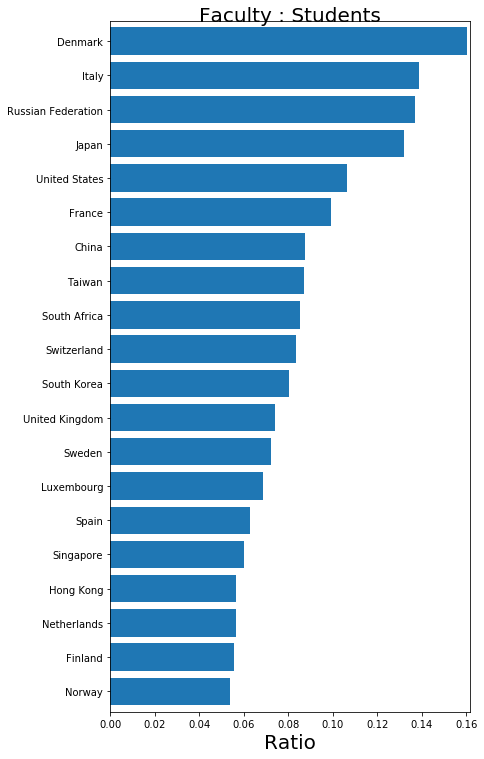

In [250]:
plot_bar('Faculty : Students', 20, times_country_facstud, times_country_facstud.index)

In [251]:
times_country_interstud[['International Students : Total Students']].head()

,International Students : Total Students
Country,
Luxembourg,0.570000
United Kingdom,0.365484
Hong Kong,0.328000
Switzerland,0.314286
Australia,0.307500


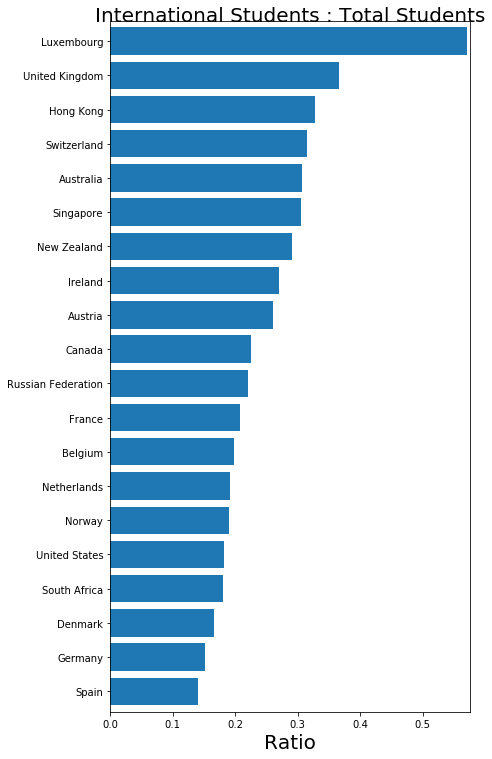

In [252]:
plot_bar('International Students : Total Students', 20, times_country_interstud, times_country_interstud.index)

### Question 2 (d): Answer the previous question aggregating the data by region.

In [253]:
# Group data by country and compute the average of all fields
times_by_region = times_universities.groupby('Region').mean()

# Sort the entries of each group
times_region_facstud = times_by_region.sort_values(
    by = 'Faculty : Students',
    ascending = False
)

times_region_interstud = times_by_region.sort_values(
    by = 'International Students : Total Students',
    ascending = False
)

times_region_facstud[['Faculty : Students']]

,Faculty : Students
Region,
North America,0.101655
Africa,0.085470
Asia,0.080345
Europe,0.065952
Oceania,0.039895


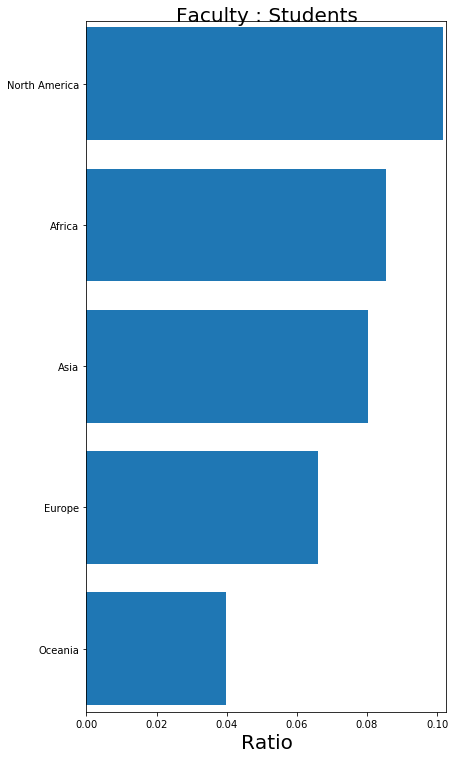

In [254]:
plot_bar('Faculty : Students', 5, times_region_facstud, times_region_facstud.index)

In [255]:
times_region_interstud[['International Students : Total Students']]

,International Students : Total Students
Region,
Oceania,0.305556
Europe,0.244653
North America,0.185588
Africa,0.180000
Asia,0.165238


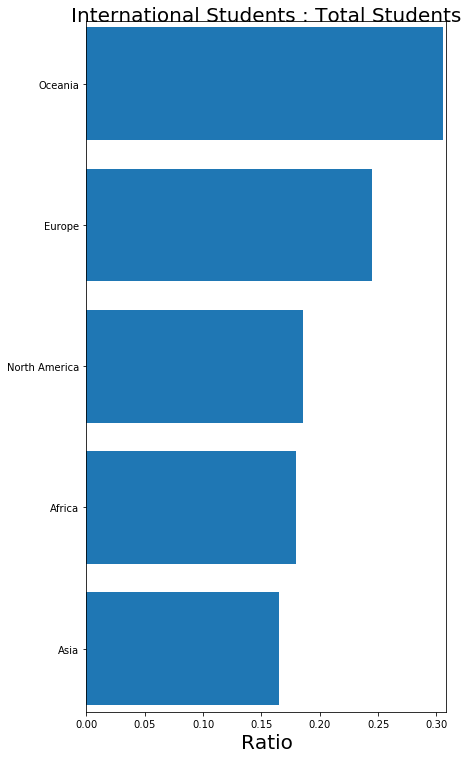

In [256]:
plot_bar('International Students : Total Students', 5, times_region_interstud, times_region_interstud.index)

### Question 3: Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

In [257]:
import re
import unicodedata

In [258]:
# ***Dark magic***
# Parse strings to make name matching easier, involving unicode, ascii codec, regular expression
# 1. Remove strings surrounded by parentheses
# 2. Remove leading article "The " if exists
# 3. Transform unicode characters ascii
# 4. Keep only alphabets
def dark_magic(name):
    name_mod = re.match(r"^([^()]*)(?:\s+\(.*\))?",name).group(1)
    name_noarticle = name_mod.replace("The ", "")
    name_toascii = unicodedata.normalize('NFD', name_noarticle).encode('ascii', 'ignore').decode("ascii")
    name_alpha = re.findall(r"[a-zA-Z]*", name_toascii)
    return ''.join(name_alpha)

print('Example:')
print('Before: École Polytechnique Fédérale de Lausanne (EPFL)')
print('After:  ' + dark_magic('École Polytechnique Fédérale de Lausanne (EPFL)'))

Example:
Before: École Polytechnique Fédérale de Lausanne (EPFL)
After:  EcolePolytechniqueFederaledeLausanne


In [259]:
# Clean up strings "Name"
top_names = pd.Series([dark_magic(top_ranking_universities.loc[i]['Name']) for i in range(200)])
top_ranking_universities['Name_mod'] = top_names

times_names = pd.Series([dark_magic(times_universities.loc[i]['Name']) for i in range(200)])
times_universities['Name_mod'] = times_names

In [260]:
times_universities.head()

,Aliases,Country,Faculty : Students,International Students : Total Students,Name,No. of Total Students,Rank,Region,Name_mod
0,University of Oxford,United Kingdom,0.089286,0.38,University of Oxford,20409,1,Europe,UniversityofOxford
1,University of Cambridge,United Kingdom,0.091743,0.35,University of Cambridge,18389,2,Europe,UniversityofCambridge
2,California Institute of Technology caltech,United States,0.153846,0.27,California Institute of Technology,2209,3,North America,CaliforniaInstituteofTechnology
3,Stanford University,United States,0.133333,0.22,Stanford University,15845,3,North America,StanfordUniversity
4,Massachusetts Institute of Technology,United States,0.114943,0.34,Massachusetts Institute of Technology,11177,5,North America,MassachusettsInstituteofTechnology


In [261]:
ranks = pd.merge(top_ranking_universities, times_universities, how='outer', on='Name_mod', suffixes=('_top','_tim'))
mask = ranks[['Rank_top','Rank_tim']].astype(str) != 'nan'
both = ranks[mask.all(axis=1)][['Rank_top','Rank_tim','Name_mod']]
tim_only = ranks[list(mask['Rank_tim']==True) and list(mask['Rank_top']==False)][['Rank_top','Rank_tim','Name_mod']]
top_only = ranks[list(mask['Rank_top']==True) and list(mask['Rank_tim']==False)][['Rank_top','Rank_tim','Name_mod']]
ranks.shape, both.shape, tim_only.shape, top_only.shape

((260, 19), (140, 3), (60, 3), (60, 3))

In [262]:
top_ranking_universities

,Country,Name,No. of International Faculty,No. of International Students,No. of Total Faculty,No. of Total Students,Rank,Region,Faculty : Students,International Students : Total Students,Name_mod
0,United States,Massachusetts Institute of Technology (MIT),1679.0,3717.0,2982.0,11067.0,1,North America,0.269450,0.335863,MassachusettsInstituteofTechnology
1,United States,Stanford University,2042.0,3611.0,4285.0,15878.0,2,North America,0.269870,0.227422,StanfordUniversity
2,United States,Harvard University,1311.0,5266.0,4350.0,22429.0,3,North America,0.193945,0.234785,HarvardUniversity
3,United States,California Institute of Technology (Caltech),350.0,647.0,953.0,2255.0,4,North America,0.422616,0.286918,CaliforniaInstituteofTechnology
4,United Kingdom,University of Cambridge,2278.0,6699.0,5490.0,18770.0,5,Europe,0.292488,0.356899,UniversityofCambridge
5,United Kingdom,University of Oxford,2964.0,7353.0,6750.0,19720.0,6,Europe,0.342292,0.372870,UniversityofOxford
6,United Kingdom,UCL (University College London),2554.0,14854.0,6345.0,31080.0,7,Europe,0.204151,0.477928,UCL
7,United Kingdom,Imperial College London,2071.0,8746.0,3930.0,16090.0,8,Europe,0.244251,0.543567,ImperialCollegeLondon
8,United States,University of Chicago,635.0,3379.0,2449.0,13557.0,9,North America,0.180645,0.249244,UniversityofChicago
9,Switzerland,ETH Zurich - Swiss Federal Institute of Techno...,1886.0,7563.0,2477.0,19815.0,10,Europe,0.125006,0.381681,ETHZurichSwissFederalInstituteofTechnology


In [280]:
pd.set_option('display.max_rows', 400)
cols = ranks.columns
(list(zip(np.arange(len(cols)),cols)))
merged = ranks.sort_values(by='Name_mod')
merged.tail().Name_mod
#merged.to_csv('merged.csv')
merged_reindex = merged.reset_index()
merged

,Country_top,Name_top,No. of International Faculty,No. of International Students,No. of Total Faculty,No. of Total Students_top,Rank_top,Region_top,Faculty : Students_top,International Students : Total Students_top,Name_mod,Aliases,Country_tim,Faculty : Students_tim,International Students : Total Students_tim,Name_tim,No. of Total Students_tim,Rank_tim,Region_tim
138,Finland,Aalto University,370.0,1831.0,1257.0,12147.0,137.0,Europe,0.103482,0.150737,AaltoUniversity,Aalto University,Finland,0.049505,0.20,Aalto University,12744.0,190.0,Europe
118,Denmark,Aarhus University,602.0,3762.0,2316.0,26226.0,119.0,Europe,0.088309,0.143445,AarhusUniversity,Aarhus University,Denmark,0.069930,0.12,Aarhus University,25167.0,109.0,Europe
170,Germany,Albert-Ludwigs-Universitaet Freiburg,413.0,3897.0,1966.0,23214.0,171.0,Europe,0.084690,0.167873,AlbertLudwigsUniversitaetFreiburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,Italy,Alma Mater Studiorum - University of Bologna,153.0,4195.0,2990.0,63399.0,188.0,Europe,0.047162,0.066168,AlmaMaterStudiorumUniversityofBologna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ArizonaStateUniversity,Arizona State University,United States,0.049751,0.19,Arizona State University,44475.0,126.0,North America
19,Australia,The Australian National University,927.0,5551.0,1600.0,14442.0,20.0,Oceania,0.110788,0.384365,AustralianNationalUniversity,Australian National University anu,Australia,0.051813,0.35,Australian National University,15986.0,48.0,Oceania
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AutonomousUniversityofBarcelona,Autonomous University of Barcelona,Spain,0.077519,0.16,Autonomous University of Barcelona,32309.0,147.0,Europe
80,United States,Boston University,379.0,7041.0,3157.0,25662.0,81.0,North America,0.123022,0.274375,BostonUniversity,Boston University,United States,0.116279,0.25,Boston University,24833.0,70.0,North America
52,United States,Brown University,379.0,1825.0,1303.0,9251.0,53.0,North America,0.140850,0.197276,BrownUniversity,Brown University,United States,0.093458,0.20,Brown University,8898.0,50.0,North America
3,United States,California Institute of Technology (Caltech),350.0,647.0,953.0,2255.0,4.0,North America,0.422616,0.286918,CaliforniaInstituteofTechnology,California Institute of Technology caltech,United States,0.153846,0.27,California Institute of Technology,2209.0,3.0,North America


In [281]:
print(type(merged_reindex.loc[105]['Name_top']))
for i in range(merged_reindex.shape[0]):
    if (type(merged_reindex.loc[i]['Name_tim']) == float) or (type(merged_reindex.loc[i]['Name_top']) ==float):
        print(i, merged_reindex.loc[i]['Name_tim'], merged_reindex.loc[i]['Name_top'])

<class 'str'>
2 nan Albert-Ludwigs-Universitaet Freiburg
3 nan Alma Mater Studiorum - University of Bologna
4 Arizona State University nan
6 Autonomous University of Barcelona nan
12 Case Western Reserve University nan
13 nan CentraleSupélec
14 nan Chalmers University of Technology
15 Charité - Universitätsmedizin Berlin nan
24 nan ETH Zurich - Swiss Federal Institute of Technology
25 ETH Zurich – Swiss Federal Institute of Technology Zurich nan
26 nan Eberhard Karls Universität Tübingen
30 nan Ecole normale supérieure, Paris
34 Free University of Berlin nan
35 nan Freie Universitaet Berlin
37 Georgetown University nan
40 nan Hanyang University
42 nan The Hebrew University of Jerusalem
43 Heidelberg University nan
44 nan Hokkaido University
47 nan Humboldt-Universität zu Berlin
48 Humboldt University of Berlin nan
50 nan Indian Institute of Science (IISc) Bangalore
51 nan Indian Institute of Technology Bombay (IITB)
52 nan Indian Institute of Technology Delhi (IITD)
53 Indiana Universi

# These are still unmerged


nan ETH Zurich - Swiss Federal Institute of Technology
ETH Zurich – Swiss Federal Institute of Technology Zurich nan

Free University of Berlin nan
nan Freie Universitaet Berlin

nan Humboldt-Universität zu Berlin
Humboldt University of Berlin nan


nan KIT, Karlsruhe Institute of Technology
Karlsruhe Institute of Technology nan



nan KAIST - Korea Advanced Institute of Science & Technology
Korea Advanced Institute of Science and Technology (KAIST) nan



LMU Munich nan
nan Ludwig-Maximilians-Universität München



nan Pohang University of Science And Technology (POSTECH)
Pohang University of Science and Technology nan



Scuola Superiore Sant’Anna nan
nan Scuola Superiore Sant'Anna Pisa di Studi Universitari e di 



Technical University of Berlin nan
nan Technische Universität Berlin (TU Berlin)



Trinity College Dublin nan
nan Trinity College Dublin, The University of Dublin



nan University of North Carolina, Chapel Hill
University of North Carolina at Chapel Hill nan



nan Wageningen University
Wageningen University & Research nan

In [282]:
def merge_rows(dataframe, list_tuples):
    for pair in list_tuples:
        row1_index, row2_index = pair
        
        a = dataframe.loc[row1_index]
        b = dataframe.loc[row2_index]
        dataframe.loc[row1_index] = a.fillna(b)
        print(a['Name_mod'])
        print(b['Name_mod'])
        
        dataframe = dataframe.drop(row2_index)

    return dataframe



In [283]:
merged_reindex

,index,Country_top,Name_top,No. of International Faculty,No. of International Students,No. of Total Faculty,No. of Total Students_top,Rank_top,Region_top,Faculty : Students_top,International Students : Total Students_top,Name_mod,Aliases,Country_tim,Faculty : Students_tim,International Students : Total Students_tim,Name_tim,No. of Total Students_tim,Rank_tim,Region_tim
0,138,Finland,Aalto University,370.0,1831.0,1257.0,12147.0,137.0,Europe,0.103482,0.150737,AaltoUniversity,Aalto University,Finland,0.049505,0.20,Aalto University,12744.0,190.0,Europe
1,118,Denmark,Aarhus University,602.0,3762.0,2316.0,26226.0,119.0,Europe,0.088309,0.143445,AarhusUniversity,Aarhus University,Denmark,0.069930,0.12,Aarhus University,25167.0,109.0,Europe
2,170,Germany,Albert-Ludwigs-Universitaet Freiburg,413.0,3897.0,1966.0,23214.0,171.0,Europe,0.084690,0.167873,AlbertLudwigsUniversitaetFreiburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187,Italy,Alma Mater Studiorum - University of Bologna,153.0,4195.0,2990.0,63399.0,188.0,Europe,0.047162,0.066168,AlmaMaterStudiorumUniversityofBologna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ArizonaStateUniversity,Arizona State University,United States,0.049751,0.19,Arizona State University,44475.0,126.0,North America
5,19,Australia,The Australian National University,927.0,5551.0,1600.0,14442.0,20.0,Oceania,0.110788,0.384365,AustralianNationalUniversity,Australian National University anu,Australia,0.051813,0.35,Australian National University,15986.0,48.0,Oceania
6,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AutonomousUniversityofBarcelona,Autonomous University of Barcelona,Spain,0.077519,0.16,Autonomous University of Barcelona,32309.0,147.0,Europe
7,80,United States,Boston University,379.0,7041.0,3157.0,25662.0,81.0,North America,0.123022,0.274375,BostonUniversity,Boston University,United States,0.116279,0.25,Boston University,24833.0,70.0,North America
8,52,United States,Brown University,379.0,1825.0,1303.0,9251.0,53.0,North America,0.140850,0.197276,BrownUniversity,Brown University,United States,0.093458,0.20,Brown University,8898.0,50.0,North America
9,3,United States,California Institute of Technology (Caltech),350.0,647.0,953.0,2255.0,4.0,North America,0.422616,0.286918,CaliforniaInstituteofTechnology,California Institute of Technology caltech,United States,0.153846,0.27,California Institute of Technology,2209.0,3.0,North America


In [293]:
#temp = times_universities.copy()
temp = merged.copy()

In [294]:
temp2 = temp.Name_mod.apply(lambda s: s.replace('ETHZurichSwissFederalInstituteofTechnologyZurich',
                                                     'ETHZurichSwissFederalInstituteofTechnology'))
temp2.sort_values()

138                                      AaltoUniversity
118                                     AarhusUniversity
170                    AlbertLudwigsUniversitaetFreiburg
187                AlmaMaterStudiorumUniversityofBologna
223                               ArizonaStateUniversity
19                          AustralianNationalUniversity
230                      AutonomousUniversityofBarcelona
80                                      BostonUniversity
52                                       BrownUniversity
3                        CaliforniaInstituteofTechnology
136                                    CardiffUniversity
47                              CarnegieMellonUniversity
236                         CaseWesternReserveUniversity
176                                      CentraleSupelec
132                       ChalmersUniversityofTechnology
224                     ChariteUniversitatsmedizinBerlin
45                           ChineseUniversityofHongKong
48                             

In [284]:
result = merge_rows(merged_reindex, [(24, 25), (34, 35), (47, 48), (57, 60), 
            (56,65), (69, 74), (100, 101), (115, 116), 
            (123, 126), (131, 132), (135, 152), (213, 214), 
            (254, 255)]).reset_index()


ETHZurichSwissFederalInstituteofTechnology
ETHZurichSwissFederalInstituteofTechnologyZurich
FreeUniversityofBerlin
FreieUniversitaetBerlin
HumboldtUniversitatzuBerlin
HumboldtUniversityofBerlin
KITKarlsruheInstituteofTechnology
KarlsruheInstituteofTechnology
KAISTKoreaAdvancedInstituteofScienceTechnology
KoreaAdvancedInstituteofScienceandTechnology
LMUMunich
LudwigMaximiliansUniversitatMunchen
PohangUniversityofScienceAndTechnology
PohangUniversityofScienceandTechnology
ScuolaSuperioreSantAnna
ScuolaSuperioreSantAnnaPisadiStudiUniversitariediPerfezionamento
TechnicalUniversityofBerlin
TechnischeUniversitatBerlin
TrinityCollegeDublin
TrinityCollegeDublinUniversityofDublin
UCL
UniversityCollegeLondon
UniversityofNorthCarolinaChapelHill
UniversityofNorthCarolinaatChapelHill
WageningenUniversity
WageningenUniversityResearch


In [285]:
result.shape

(247, 21)

In [286]:
# Remove universities that are not in both dataframes
result_notinboth = result.drop(result[result.Name_top.isnull()].index)
print(result_notinboth.shape)
result_notinboth.drop(result[result.Name_tim.isnull()].index, inplace=True)

(200, 21)


In [287]:
result_notinboth[['Name_top', 'Name_tim']].shape

(153, 2)

In [295]:
merged.shape

(260, 19)

In [296]:
result_notinboth[['Name_top', 'Faculty : Students_top', 'Faculty : Students_tim']]
result_notinboth[['Name_top', 'International Students : Total Students_top','International Students : Total Students_tim']]


,Name_top,International Students : Total Students_top,International Students : Total Students_tim
0,Aalto University,0.150737,0.20
1,Aarhus University,0.143445,0.12
5,The Australian National University,0.384365,0.35
7,Boston University,0.274375,0.25
8,Brown University,0.197276,0.20
9,California Institute of Technology (Caltech),0.286918,0.27
10,Cardiff University,0.247914,0.26
11,Carnegie Mellon University,0.478062,0.45
16,The Chinese University of Hong Kong (CUHK),0.267450,0.31
17,City University of Hong Kong,0.354221,0.35


### Question 4: Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

1. sort by rank of topuniversities.com, then compare with timesuniversities, (vice versa)
2. Look at differences between ratios, specifically faculty: student
3. How any of the two ratios affect rank
4. 


In [297]:
result_notinboth[['Name_top', 'International Students : Total Students_top','International Students : Total Students_tim']]


,Name_top,International Students : Total Students_top,International Students : Total Students_tim
0,Aalto University,0.150737,0.20
1,Aarhus University,0.143445,0.12
5,The Australian National University,0.384365,0.35
7,Boston University,0.274375,0.25
8,Brown University,0.197276,0.20
9,California Institute of Technology (Caltech),0.286918,0.27
10,Cardiff University,0.247914,0.26
11,Carnegie Mellon University,0.478062,0.45
16,The Chinese University of Hong Kong (CUHK),0.267450,0.31
17,City University of Hong Kong,0.354221,0.35


In [298]:
cols = [
    'Name_mod',
    'Country_top',
    'Region_top',
    
    'Rank_tim',
    'Rank_top',
    
    'Faculty : Students_tim',
    'International Students : Total Students_tim',
    'No. of Total Students_tim',
    
    'Faculty : Students_top',
    'International Students : Total Students_top',
    'No. of International Faculty',
    'No. of International Students',
    'No. of Total Faculty',
    'No. of Total Students_top']
variables = result_notinboth[cols].reset_index(drop=True)

In [299]:
variables.set_value(55,  8, variables.iloc[55][5], takeable=True)
variables.set_value(55,  9, variables.iloc[55][6], takeable=True)
variables.set_value(55, 10,                     0, takeable=True)
variables.set_value(55, 11,                     0, takeable=True)
variables.set_value(55, 12,                     0, takeable=True)
variables.set_value(55, 13, variables.iloc[55][7], takeable=True)
print('Is there nan in the data: ', variables.isnull().values.any())

Is there nan in the data:  False


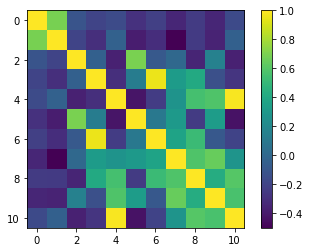

In [300]:
cor_mat = np.corrcoef(variables[cols[3:]].transpose())
plt.imshow(cor_mat)
plt.colorbar()
plt.show()

### Question 5: Can you find the best university taking in consideration both rankings? Explain your approach.

In [301]:
compare_ranks = result_notinboth[['Name_top', 'Rank_top', 'Rank_tim']]
compare_ranks.shape
# compare_ranks.Rank_top

top_ranks = compare_ranks.sort_values(by = 'Rank_top')
top_ranks['Rank_top'] = np.linspace(0, 1, num = compare_ranks.shape[0])
print(top_ranks)

                                              Name_top  Rank_top  Rank_tim
71         Massachusetts Institute of Technology (MIT)  0.000000       5.0
111                                Stanford University  0.006579       3.0
39                                  Harvard University  0.013158       6.0
9         California Institute of Technology (Caltech)  0.019737       3.0
165                            University of Cambridge  0.026316       2.0
207                               University of Oxford  0.032895       1.0
125                    UCL (University College London)  0.039474      16.0
46                             Imperial College London  0.046053       8.0
167                              University of Chicago  0.052632       9.0
24   ETH Zurich - Swiss Federal Institute of Techno...  0.059211      10.0
78   Nanyang Technological University, Singapore (NTU)  0.065789      52.0
28     Ecole Polytechnique Fédérale de Lausanne (EPFL)  0.072368      38.0
98                       

In [302]:
times_ranks = top_ranks.sort_values(by = 'Rank_tim')
times_ranks['Rank_tim'] = np.linspace(0, 1, num = compare_ranks.shape[0])


In [303]:
times_ranks['mean_rank'] = times_ranks[['Rank_top', 'Rank_tim']].mean(axis = 1)
# print(times_ranks[['Name_top', 'mean_rank']])

combined_rank = times_ranks.sort_values(by = 'mean_rank')
combined_rank['final_rank'] = np.linspace(1, combined_rank.shape[0], num = combined_rank.shape[0])


combined_rank['final_withties'] = combined_rank.groupby('mean_rank')['final_rank'].transform(lambda group: group.min())
combined_rank

,Name_top,Rank_top,Rank_tim,mean_rank,final_rank,final_withties
111,Stanford University,0.006579,0.013158,0.009868,1.0,1.0
71,Massachusetts Institute of Technology (MIT),0.000000,0.026316,0.013158,2.0,2.0
207,University of Oxford,0.032895,0.000000,0.016447,3.0,3.0
165,University of Cambridge,0.026316,0.006579,0.016447,4.0,3.0
9,California Institute of Technology (Caltech),0.019737,0.019737,0.019737,5.0,5.0
39,Harvard University,0.013158,0.032895,0.023026,6.0,6.0
46,Imperial College London,0.046053,0.046053,0.046053,7.0,7.0
167,University of Chicago,0.052632,0.052632,0.052632,8.0,8.0
98,Princeton University,0.078947,0.039474,0.059211,9.0,9.0
24,ETH Zurich - Swiss Federal Institute of Techno...,0.059211,0.065789,0.062500,10.0,10.0
